In [49]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

import pandas as pd
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["label"] = dataset.target

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(dataset.data)
print (pca.shape)

(506, 2)


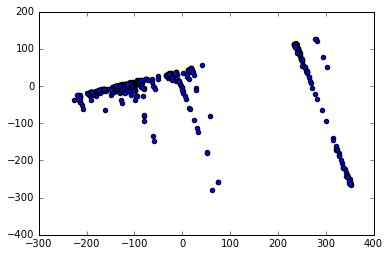

In [51]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(pca[:,0],pca[:,1])
plt.show()

In [58]:
X = dataset.data 
Y = dataset.target
l = X.shape[0] 

x_train_data = pd.DataFrame(data=X[:-l/3])
x_test_data = pd.DataFrame(data=X[-l/3:])
y_train_data = Y[:-l/3]
y_test_data = Y[-l/3:]

x_train_pca = pd.DataFrame(data=pca[:-l/3])
x_test_pca = pd.DataFrame(data=pca[-l/3:])
y_train_pca = Y[:-l/3]
y_test_pca = Y[-l/3:]

In [59]:
from sklearn import linear_model
clf_data = linear_model.LinearRegression()
clf_pca = linear_model.LinearRegression()
clf_data.fit(x_train_data, y_train_data)
clf_pca.fit(x_train_pca, y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
data_preds = clf_data.predict(x_test_data)
data_errors = sklearn.metrics.mean_squared_error(y_test_data, data_preds)

pca_preds  = clf_pca.predict(x_test_pca)
pca_errors = sklearn.metrics.mean_squared_error(y_test_pca, pca_preds)

print ("mean squared error in original space: %s; MSE in reduced space: %s" % (data_errors, pca_errors))


mean squared error in original space: 450.729511735; MSE in reduced space: 88.3675802124
